In [72]:
import numpy as np
import seaborn as sns; sns.set()
import scipy as sc
import matplotlib.pylab as plt

# Parametric Density Estimation

For example, the normal distribution has two parameters: the mean and the standard deviation. Given these two parameters, we now know the probability distribution function. These parameters can be estimated from data by calculating the sample mean and sample standard deviation.

We refer to this process as parametric density estimation.

In [79]:
sample = np.random.normal(0,1,1000)


In [80]:
# We can then pretend that we don’t know the probability distribution 
# calculate parameters
sample_mean = np.mean(sample)
sample_std = np.std(sample)
print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))

Mean=0.026, Standard Deviation=0.994


In [81]:
# fit the distribution with these parameters,
# so-called parametric density estimation of our data sample.
# define the distribution
my_dist = sc.stats.norm(sample_mean, sample_std)

In [82]:
# sample probabilities for a range of outcomes
values = np.arange(-6,6,0.2)
probabilities = my_dist.pdf(values) #

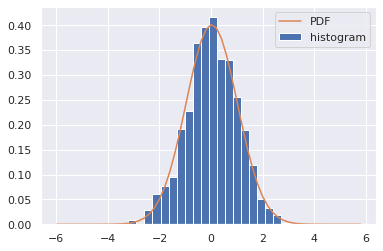

In [83]:
# plot the histogram and pdf
plt.hist(sample, bins=20, density=True,label="histogram")
plt.plot(values, probabilities,label="PDF")
plt.legend()

### Until what moment is true?

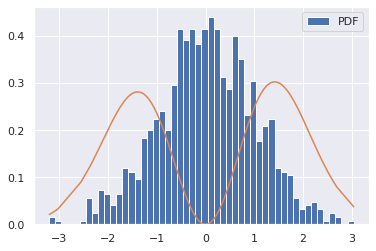

In [95]:
# plot the histogram and pdf
plt.hist(sample, bins=50, density=True,label="PDF")

sort_samp = np.sort(sample)
sort_prob = my_dist.pdf(sort_samp)

#k-th central moment
k = 2
y = sort_prob * sort_samp**k

plt.plot(sort_samp, y)
plt.legend()

# Nonparametric Density Estimation

Perhaps the most common nonparametric approach for estimating the probability density function of a continuous random variable is called kernel smoothing, or kernel density estimation, KDE for short.

Kernel Density Estimation: Nonparametric method for using a dataset to estimating probabilities for new points.

In [2]:
# example of a bimodal data sample
# generate a sample
sample1 = np.random.normal(loc=20, scale=5, size=300)
sample2 = np.random.normal(loc=40, scale=5, size=700)

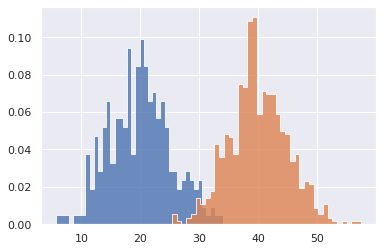

In [3]:
kwargs = dict(histtype='stepfilled', alpha=0.8, density=True, bins=40)
plt.hist(sample1, **kwargs);
plt.hist(sample2, **kwargs);

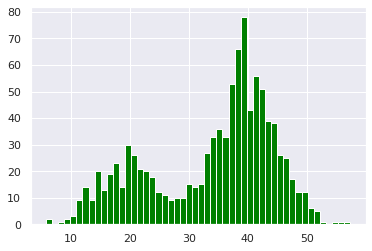

In [4]:
# It is a good case for using a nonparametric kernel density estimation method.
sample = np.hstack((sample1, sample2))


# plot the histogram
plt.hist(sample, bins=50,color='green')
plt.show()


### Try parametric method

In [5]:
# We can then pretend that we don’t know the probability distribution 
# calculate parameters
sample_mean = np.mean(sample)
sample_std = np.std(sample)
print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))

Mean=33.940, Standard Deviation=10.481


In [6]:
# fit the distribution with these parameters,
# so-called parametric density estimation of our data sample.
# define the distribution
my_dist = sc.stats.norm(sample_mean, sample_std)

In [9]:
# sample probabilities for a range of outcomes
values = np.arange(10,60)
probabilities = my_dist.pdf(values) #

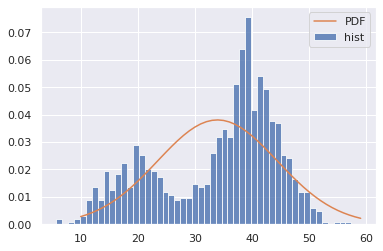

In [15]:
# plot the histogram and pdf
plt.hist(sample, bins=50, density=True,label="hist",alpha = 0.8)
plt.plot(values, probabilities,label="PDF")
plt.legend()

### Try nonparametric KernelDensity method

In [17]:
from sklearn.neighbors import KernelDensity

# fit density (smaller bandwidth is more accurate)
model = KernelDensity(bandwidth=1, kernel='gaussian')

# Convert the sample 1-D array with len(sample) elements 
# into len(sample)-D array with 1 element
sample = sample.reshape((len(sample), 1)) 

model.fit(sample)

KernelDensity(bandwidth=1)

In [18]:
# sample probabilities for a range of outcomes
values = np.arange(1,60)

In [20]:
# Convert the sample 1-D array with len(sample) elements 
# into len(sample)-D array with 1 element
values = values.reshape((len(values), 1))

In [21]:
probabilities = model.score_samples(values)
probabilities = np.exp(probabilities)

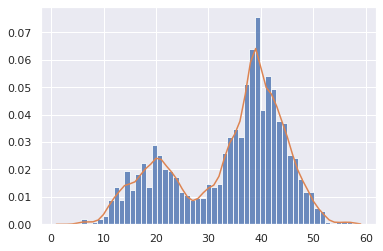

In [22]:
# plot the histogram and pdf
plt.hist(sample, bins=50, density=True,alpha = 0.8)
plt.plot(values, probabilities)

In [13]:
np.var(sample)

109.84832848361464